In [2]:
import pandas as pd
from datetime import datetime

# Load the merged data
data_path = "C:/dangoal25/data/clean_log_data_with_categories.csv"
data = pd.read_csv(data_path)

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Filter for order interactions only
order_data = data[data['inter'] == 'order']

# Sort by user, category, and date to prepare for calculating the time difference
order_data = order_data.sort_values(by=['user_id', 'bd_item_lcls_cd', 'date'])

# Calculate days since last purchase for each customer and category
order_data['days_since_last_purchase'] = order_data.groupby(['user_id', 'bd_item_lcls_cd'])['date'].diff().dt.days

print("Step 1: Calculated days since last purchase for each customer and category.")

Step 1: Calculated days since last purchase for each customer and category.


In [8]:
# Calculate the average purchase interval for each customer and category
avg_purchase_interval_customer = order_data.groupby(['user_id', 'bd_item_lcls_cd'])['days_since_last_purchase'].mean().reset_index(name='average_purchase_interval')

print("Step 2: Calculated average purchase interval for each customer by category.")

Step 2: Calculated average purchase interval for each customer by category.


In [9]:
# Calculate the standard deviation of the days between purchases for each customer-category pair
purchase_pattern = order_data.groupby(['user_id', 'bd_item_lcls_cd'])['days_since_last_purchase'].std().reset_index(name='purchase_interval_std_dev')

# Merge the average interval with the standard deviation data
purchase_pattern = pd.merge(avg_purchase_interval_customer, purchase_pattern, on=['user_id', 'bd_item_lcls_cd'])

# Filter to find regular purchase patterns (low variance)
regular_patterns = purchase_pattern[purchase_pattern['purchase_interval_std_dev'] < 5]  # Adjust threshold as needed

print("Step 3: Identified customers with regular purchase patterns.")

Step 3: Identified customers with regular purchase patterns.


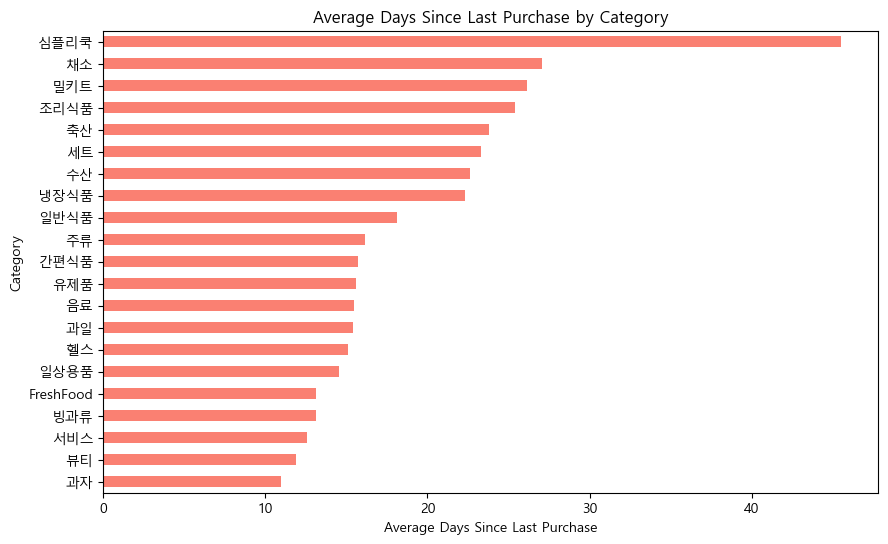

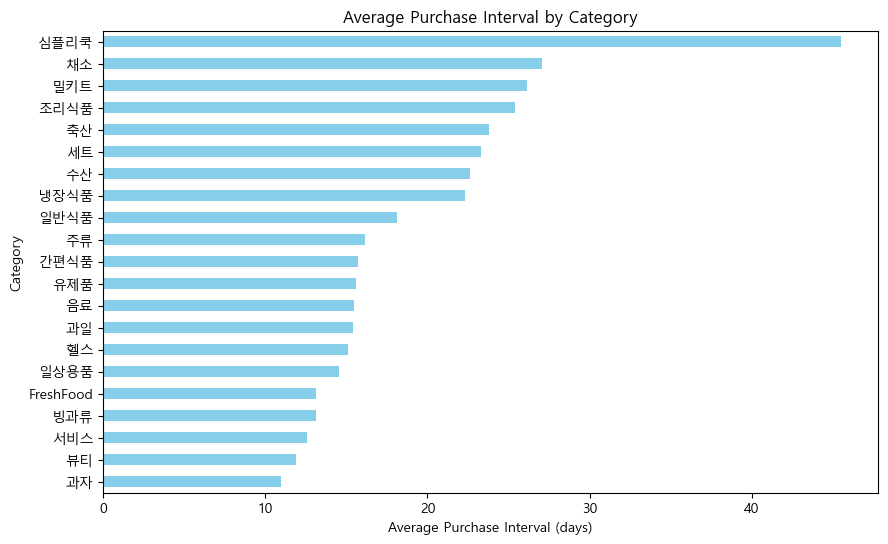

In [12]:
import matplotlib.pyplot as plt

# Set Korean font for plots
plt.rc('font', family='Malgun Gothic')  # Windows users
# plt.rc('font', family='AppleGothic')  # Mac users
plt.rcParams['axes.unicode_minus'] = False

# Plot 1: Average Days Since Last Purchase by Category (recency data)
recency_data_by_name = order_data.groupby('bd_item_lcls_nm')['days_since_last_purchase'].mean().dropna()
plt.figure(figsize=(10, 6))
recency_data_by_name.sort_values().plot(kind='barh', color='salmon')
plt.xlabel("Average Days Since Last Purchase")
plt.ylabel("Category")
plt.title("Average Days Since Last Purchase by Category")
plt.show()

# Plot 2: Average Purchase Interval by Category (average purchase interval)
avg_purchase_interval_by_name = avg_purchase_interval.groupby('bd_item_lcls_nm')['average_purchase_interval'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_purchase_interval_by_name.plot(kind='barh', color='skyblue')
plt.xlabel("Average Purchase Interval (days)")
plt.ylabel("Category")
plt.title("Average Purchase Interval by Category")
plt.show()